### HomeWork 2- 
<h1 align="center"> 17350796</h1>

In [117]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages


from scipy import stats




# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from numpy import sqrt

from sklearn.ensemble import RandomForestRegressor



import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8



import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm



<h2 align="center"> Introduction</h2>

In this notebook, machine learning models are created, trained and evaluated in the aim of predicting house prices in Ireland. This is a very interesting and pertinent task considering the housing crisis in Ireland. 

Firstly, the data frame from the previous data preparation task is loaded. This data is again cleaned to ensure it is as robust as possible. This data is then split 70% training and 30% test. As our target feature is continous data, this is a regression task. A number graphs and plots are computed to see what features interact with the price data. The training features are then finalized. Using these training features a multiple linear regression model, a decision tree, and a random forest model are generated. Interpretation, evaluation and cross validation is performed on each model. The best model is chosen and improvements for this model are attempted. This is then evaluated on new test data.   

In [3]:

df = pd.read_csv('final-file-additonal-features-17350796.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)



In [4]:
df.head()

Date of Sale (yyyy/mm/dd)                             Address Postal Code  \
0       2016-06-05 00:00:00        21 curzon st, portobello, d8          d8   
1       2014-12-22 00:00:00      44 rothe abbey, kilmainham, d8          d8   
2       2020-05-22 00:00:00  17 merrion park, blackrock, dublin         NaN   
3       2014-11-27 00:00:00    knockroe, rathmoyle, co.kilkenny         NaN   
4       2018-11-22 00:00:00  15 shannon park, lifford rd, ennis         NaN   

     County  Price (€) Not Full Market Price VAT Exclusive  \
0    Dublin   630000.0                    No            No   
1    Dublin   281000.0                    No            No   
2    Dublin   560000.0                    No            No   
3  Kilkenny    46000.0                    No            No   
4     Clare   204000.0                    No            No   

                 Description of Property Property Size Description  Month  \
0  Second-Hand Dwelling house /Apartment                      None    6.0   
1  Second-Hand Dwelling house /Apartment                      None   12.0   
2  Second-Hand Dwelling house /Apartment                      None    5.0   
3  Second-Hand Dwelling house /Apartment                      None   11.0   
4  Second-Hand Dwelling house /Apartment                      None   11.0   

     Year   percent  Season  Province GDP (USD-Billion)  \
0  2016.0  0.032830  Summer  Leinster            298.73   
1  2014.0  0.032830  Winter  Leinster            258.63   
2  2020.0  0.032830  Spring  Leinster            425.89   
3  2014.0  0.806452  Autumn  Leinster            258.63   
4  2018.0  0.432900  Autumn   Munster            384.85   

  Total Number of Loans Approved Added Post Codes  
0                        35037.0               d8  
1                        31897.0               d8  
2                         Unkown              NaN  
3                        31897.0              NaN  
4                         Unkown              NaN

In [5]:
df.tail()

Date of Sale (yyyy/mm/dd)                                    Address  \
9542       2012-12-18 00:00:00    17 the court, cypress downs, templeogue   
9543       2016-12-14 00:00:00  the log cabin, forge cottage, cullenstown   
9544       2017-06-19 00:00:00               carrig rd, parkmore, roscrea   
9545                2022-01-04                                        NaN   
9546                2022-01-06                                        NaN   

     Postal Code     County  Price (€) Not Full Market Price VAT Exclusive  \
9542         NaN     Dublin  605000.00                    No            No   
9543         NaN    Wexford   46666.67                    No            No   
9544         NaN  Tipperary  176000.00                    No            No   
9545         NaN        NaN        NaN                   NaN           NaN   
9546         NaN        NaN        NaN                   NaN           NaN   

                    Description of Property Property Size Description  Month  \
9542  Second-Hand Dwelling house /Apartment                      None   12.0   
9543  Second-Hand Dwelling house /Apartment                      None   12.0   
9544  Second-Hand Dwelling house /Apartment                      None    6.0   
9545                                    NaN                       NaN    1.0   
9546                                    NaN                       NaN    1.0   

        Year   percent  Season  Province GDP (USD-Billion)  \
9542  2012.0  0.032830  Winter  Leinster            225.51   
9543  2016.0  0.286533  Winter  Leinster            298.73   
9544  2017.0  0.371747  Summer   Munster             334.6   
9545     NaN  0.000000  Winter       NaN               NaN   
9546     NaN  0.000000  Winter       NaN               NaN   

     Total Number of Loans Approved Added Post Codes  
9542                        17769.0              NaN  
9543                        35037.0              NaN  
9544                         Unkown              NaN  
9545                            NaN              NaN  
9546                            NaN              NaN

In [6]:
# df = df[df.Address != 0]
df = df[df.Address.notnull()]

df.tail()

Date of Sale (yyyy/mm/dd)                                    Address  \
9540       2016-12-22 00:00:00        8 oakpark, newcastle west, limerick   
9541       2017-12-15 00:00:00           knockasartnett, killarney, kerry   
9542       2012-12-18 00:00:00    17 the court, cypress downs, templeogue   
9543       2016-12-14 00:00:00  the log cabin, forge cottage, cullenstown   
9544       2017-06-19 00:00:00               carrig rd, parkmore, roscrea   

     Postal Code     County  Price (€) Not Full Market Price VAT Exclusive  \
9540         NaN   Limerick  118000.00                    No            No   
9541         NaN      Kerry  200000.00                    No            No   
9542         NaN     Dublin  605000.00                    No            No   
9543         NaN    Wexford   46666.67                    No            No   
9544         NaN  Tipperary  176000.00                    No            No   

                    Description of Property Property Size Description  Month  \
9540  Second-Hand Dwelling house /Apartment                      None   12.0   
9541  Second-Hand Dwelling house /Apartment                      None   12.0   
9542  Second-Hand Dwelling house /Apartment                      None   12.0   
9543  Second-Hand Dwelling house /Apartment                      None   12.0   
9544  Second-Hand Dwelling house /Apartment                      None    6.0   

        Year   percent  Season  Province GDP (USD-Billion)  \
9540  2016.0  0.294118  Winter   Munster            298.73   
9541  2017.0  0.370370  Winter   Munster             334.6   
9542  2012.0  0.032830  Winter  Leinster            225.51   
9543  2016.0  0.286533  Winter  Leinster            298.73   
9544  2017.0  0.371747  Summer   Munster             334.6   

     Total Number of Loans Approved Added Post Codes  
9540                        35037.0              NaN  
9541                         Unkown              NaN  
9542                        17769.0              NaN  
9543                        35037.0              NaN  
9544                         Unkown              NaN

In [7]:
# Converting NaN values to None

df = df.fillna('none')


#### Deleting redundant column:

In [8]:

# deleting percent column
del df["percent"]

#### Checking for NaN values

In [9]:

((df['Price (€)'] == 'None')).any()


False

In [10]:
df.isnull().values.any()


False

#### Removing extreme Prices:

In [11]:

numeric_columns = df.select_dtypes(['float64','int']).columns

df[numeric_columns].describe().T


count           mean            std     min       25%       50%  \
Price (€)  9545.0  259411.117276  284346.547436  5500.0  123000.0  206090.0   
Month      9545.0       6.869565       3.480466     1.0       4.0       7.0   
Year       9545.0    2016.524358       3.101567  2010.0    2014.0    2017.0   

                 75%        max  
Price (€)  314977.97  7600000.0  
Month          10.00       12.0  
Year         2019.00     2022.0

In [12]:
q = df["Price (€)"].quantile(0.99)
df[df["Price (€)"] < q]
q_low = df["Price (€)"].quantile(0.01)
q_hi  = df["Price (€)"].quantile(0.99)

df = df[(df["Price (€)"] < q_hi) & (df["Price (€)"] > q_low)]

df[numeric_columns].describe().T


count           mean            std      min       25%       50%  \
Price (€)  9353.0  242615.317045  172325.996980  22000.0  125000.0  206090.0   
Month      9353.0       6.866353       3.478471      1.0       4.0       7.0   
Year       9353.0    2016.519833       3.102721   2010.0    2014.0    2017.0   

                75%        max  
Price (€)  310000.0  1255000.0  
Month          10.0       12.0  
Year         2019.0     2022.0

In [13]:
df.head()

Date of Sale (yyyy/mm/dd)                             Address Postal Code  \
0       2016-06-05 00:00:00        21 curzon st, portobello, d8          d8   
1       2014-12-22 00:00:00      44 rothe abbey, kilmainham, d8          d8   
2       2020-05-22 00:00:00  17 merrion park, blackrock, dublin        none   
3       2014-11-27 00:00:00    knockroe, rathmoyle, co.kilkenny        none   
4       2018-11-22 00:00:00  15 shannon park, lifford rd, ennis        none   

     County  Price (€) Not Full Market Price VAT Exclusive  \
0    Dublin   630000.0                    No            No   
1    Dublin   281000.0                    No            No   
2    Dublin   560000.0                    No            No   
3  Kilkenny    46000.0                    No            No   
4     Clare   204000.0                    No            No   

                 Description of Property Property Size Description  Month  \
0  Second-Hand Dwelling house /Apartment                      None    6.0   
1  Second-Hand Dwelling house /Apartment                      None   12.0   
2  Second-Hand Dwelling house /Apartment                      None    5.0   
3  Second-Hand Dwelling house /Apartment                      None   11.0   
4  Second-Hand Dwelling house /Apartment                      None   11.0   

     Year  Season  Province GDP (USD-Billion) Total Number of Loans Approved  \
0  2016.0  Summer  Leinster            298.73                        35037.0   
1  2014.0  Winter  Leinster            258.63                        31897.0   
2  2020.0  Spring  Leinster            425.89                         Unkown   
3  2014.0  Autumn  Leinster            258.63                        31897.0   
4  2018.0  Autumn   Munster            384.85                         Unkown   

  Added Post Codes  
0               d8  
1               d8  
2             none  
3             none  
4             none

In [14]:
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')

df['Date of Sale (yyyy/mm/dd)'] = pd.to_datetime(df['Date of Sale (yyyy/mm/dd)'])

df['Month'] = df['Month'].astype('category')

df['Year'] = df['Year'].astype('category')


df['Province'] = df['Province'].astype('category')

df['GDP (USD-Billion)'] = df['GDP (USD-Billion)'].astype('category')



df['Total Number of Loans Approved'] = df['Total Number of Loans Approved'].astype('category')

df['Season'] = df['Season'].astype('category')

df['Added Post Codes'] = df['Added Post Codes'].astype('category')

















df.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [15]:
df.isnull().values.any()


False

## (1) Data understanding and perparation

#####  Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.

#### (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [16]:

y =df[['Price (€)']]


X = df.drop(['Price (€)'], 1)


train, test = train_test_split(df, test_size=0.3, random_state=1)


In [17]:
y.head()

Price (€)
0   630000.0
1   281000.0
2   560000.0
3    46000.0
4   204000.0

In [18]:
X.head()

Date of Sale (yyyy/mm/dd)                             Address Postal Code  \
0                2016-06-05        21 curzon st, portobello, d8          d8   
1                2014-12-22      44 rothe abbey, kilmainham, d8          d8   
2                2020-05-22  17 merrion park, blackrock, dublin        none   
3                2014-11-27    knockroe, rathmoyle, co.kilkenny        none   
4                2018-11-22  15 shannon park, lifford rd, ennis        none   

     County Not Full Market Price VAT Exclusive  \
0    Dublin                    No            No   
1    Dublin                    No            No   
2    Dublin                    No            No   
3  Kilkenny                    No            No   
4     Clare                    No            No   

                 Description of Property Property Size Description Month  \
0  Second-Hand Dwelling house /Apartment                      None   6.0   
1  Second-Hand Dwelling house /Apartment                      None  12.0   
2  Second-Hand Dwelling house /Apartment                      None   5.0   
3  Second-Hand Dwelling house /Apartment                      None  11.0   
4  Second-Hand Dwelling house /Apartment                      None  11.0   

     Year  Season  Province GDP (USD-Billion) Total Number of Loans Approved  \
0  2016.0  Summer  Leinster            298.73                        35037.0   
1  2014.0  Winter  Leinster            258.63                        31897.0   
2  2020.0  Spring  Leinster            425.89                         Unkown   
3  2014.0  Autumn  Leinster            258.63                        31897.0   
4  2018.0  Autumn   Munster            384.85                         Unkown   

  Added Post Codes  
0               d8  
1               d8  
2             none  
3             none  
4             none

In [19]:
train.shape

(6547, 16)

In [20]:
train

Date of Sale (yyyy/mm/dd)  \
551                 2021-04-01   
4758                2015-05-22   
4358                2016-02-24   
1643                2019-06-18   
3511                2013-11-25   
...                        ...   
2972                2017-07-19   
7975                2019-07-10   
925                 2013-04-01   
5312                2020-10-29   
237                 2019-05-31   

                                                Address Postal Code  \
551                   lisieux house, turbotstown, coole        none   
4758        25 woodview court, glenalbyn rd, stillorgan        none   
4358               10 lar easa court, strandhill, sligo        none   
1643                47 sandyhill gardens, ballymun, d11         d11   
3511  19 ard na mul  lis na dara, carrick road, dundalk        none   
...                                                 ...         ...   
2972  apt 42 new bancroft centre, main street, tallaght         d24   
7975  27 ilex house, mespil house flats estate, suss...          d4   
925           63 mount eagle view, leopardstown heights         d18   
5312       4 willow park, westminster park, foxrock d18         d18   
237              85 gleann alainn, tullyallen, drogheda        none   

         County  Price (€) Not Full Market Price VAT Exclusive  \
551   Westmeath  260000.00                    No            No   
4758     Dublin  285000.00                    No            No   
4358      Sligo  101000.00                    No            No   
1643     Dublin  200000.00                    No            No   
3511      Louth  167000.00                    No            No   
...         ...        ...                   ...           ...   
2972     Dublin  183593.98                    No           Yes   
7975     Dublin  350000.00                    No            No   
925      Dublin  408350.00                    No            No   
5312     Dublin  520000.00                    No            No   
237       Louth  323000.00                    No            No   

                    Description of Property  \
551   Second-Hand Dwelling house /Apartment   
4758  Second-Hand Dwelling house /Apartment   
4358  Second-Hand Dwelling house /Apartment   
1643  Second-Hand Dwelling house /Apartment   
3511  Second-Hand Dwelling house /Apartment   
...                                     ...   
2972          New Dwelling house /Apartment   
7975  Second-Hand Dwelling house /Apartment   
925   Second-Hand Dwelling house /Apartment   
5312  Second-Hand Dwelling house /Apartment   
237   Second-Hand Dwelling house /Apartment   

                              Property Size Description Month    Year  Season  \
551                                                None   4.0  2021.0  Spring   
4758                                               None   5.0  2015.0  Spring   
4358                                               None   2.0  2016.0  Winter   
1643                                               None   6.0  2019.0  Summer   
3511                                               None  11.0  2013.0  Autumn   
...                                                 ...   ...     ...     ...   
2972  greater than or equal to 38 sq metres and less...   7.0  2017.0  Summer   
7975                                               None   7.0  2019.0  Summer   
925                                                None   4.0  2013.0  Spring   
5312                                               None  10.0  2020.0  Autumn   
237                                                None   5.0  2019.0  Spring   

       Province GDP (USD-Billion) Total Number of Loans Approved  \
551    Leinster             440.0                         Unkown   
4758   Leinster            291.46                        32236.0   
4358  Connaught            298.73                        35037.0   
1643   Leinster            399.12                         Unkown   
3511   Leinster            238.21                        19258.0   
... 

- The only continuous data type in my data set is the price data. Therefore, I will only be plotting pairwise interactions between the target feature of price and my categorical features

In [21]:
train['County'] = train['County'].astype('category')

# There are a set number of unique descriptions

train['Description of Property'] = train['Description of Property'].astype('category')

train['Address'] = train['Address'].astype('category')


# Postal code has a set number of unique categories
train['Postal Code'] = train['Postal Code'].astype('category')

# There are a set number of property size descriptions
train['Property Size Description'] = train['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
train['VAT Exclusive'] = train['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
train['Not Full Market Price'] = train['Not Full Market Price'].astype('category')

train['Date of Sale (yyyy/mm/dd)'] = pd.to_datetime(train['Date of Sale (yyyy/mm/dd)'])

train['Month'] = train['Month'].astype('category')

train['Year'] = train['Year'].astype('category')


train['Province'] = train['Province'].astype('category')

train['GDP (USD-Billion)'] = train['GDP (USD-Billion)'].astype('category')



train['Total Number of Loans Approved'] = train['Total Number of Loans Approved'].astype('category')

train['Season'] = train['Season'].astype('category')

train['Added Post Codes'] = train['Added Post Codes'].astype('category')









train.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [22]:
train.head(3)

Date of Sale (yyyy/mm/dd)                                      Address  \
551                 2021-04-01            lisieux house, turbotstown, coole   
4758                2015-05-22  25 woodview court, glenalbyn rd, stillorgan   
4358                2016-02-24         10 lar easa court, strandhill, sligo   

     Postal Code     County  Price (€) Not Full Market Price VAT Exclusive  \
551         none  Westmeath   260000.0                    No            No   
4758        none     Dublin   285000.0                    No            No   
4358        none      Sligo   101000.0                    No            No   

                    Description of Property Property Size Description Month  \
551   Second-Hand Dwelling house /Apartment                      None   4.0   
4758  Second-Hand Dwelling house /Apartment                      None   5.0   
4358  Second-Hand Dwelling house /Apartment                      None   2.0   

        Year  Season   Province GDP (USD-Billion)  \
551   2021.0  Spring   Leinster             440.0   
4758  2015.0  Spring   Leinster            291.46   
4358  2016.0  Winter  Connaught            298.73   

     Total Number of Loans Approved Added Post Codes  
551                          Unkown             none  
4758                        32236.0             none  
4358                        35037.0             none

In [23]:
category_columns = train.select_dtypes(['category']).columns
target_feature = train.select_dtypes(['float64']).columns



In [24]:
train.tail(1)

Date of Sale (yyyy/mm/dd)                                 Address  \
237                2019-05-31  85 gleann alainn, tullyallen, drogheda   

    Postal Code County  Price (€) Not Full Market Price VAT Exclusive  \
237        none  Louth   323000.0                    No            No   

                   Description of Property Property Size Description Month  \
237  Second-Hand Dwelling house /Apartment                      None   5.0   

       Year  Season  Province GDP (USD-Billion)  \
237  2019.0  Spring  Leinster            399.12   

    Total Number of Loans Approved Added Post Codes  
237                         Unkown             none

### (1.2) On the training set:
####    - Plot the correlations between all the continuous features (if any). Discuss what you observe in these plots.
####    - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices

### County

<AxesSubplot:xlabel='County', ylabel='Price (€)'>

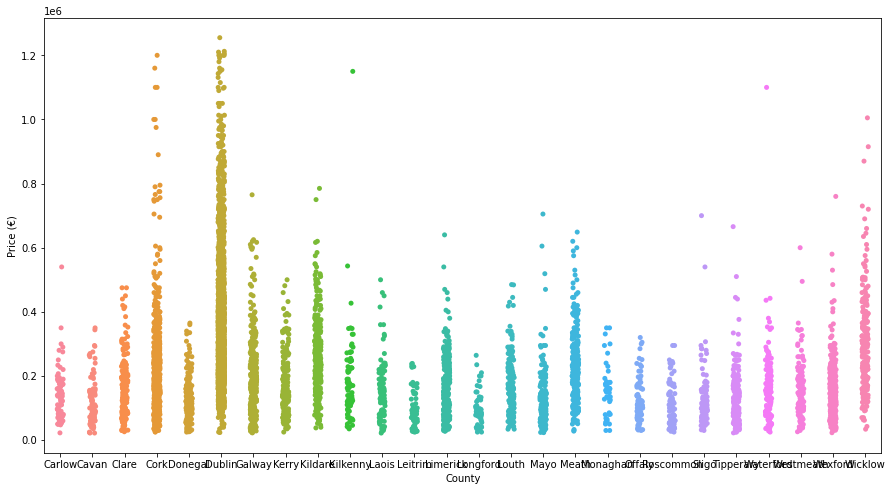

In [25]:
sns.stripplot(x="County", y="Price (€)", data=train) 


<AxesSubplot:xlabel='County', ylabel='Price (€)'>

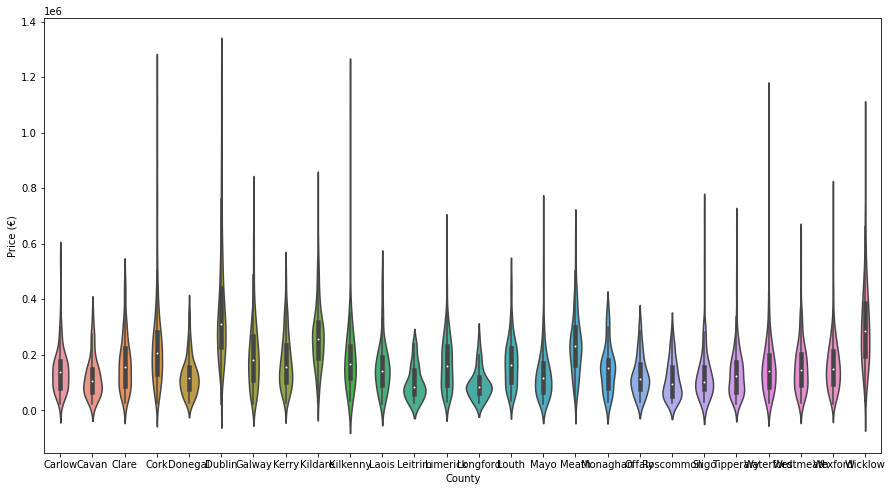

In [26]:
sns.violinplot(x="County", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

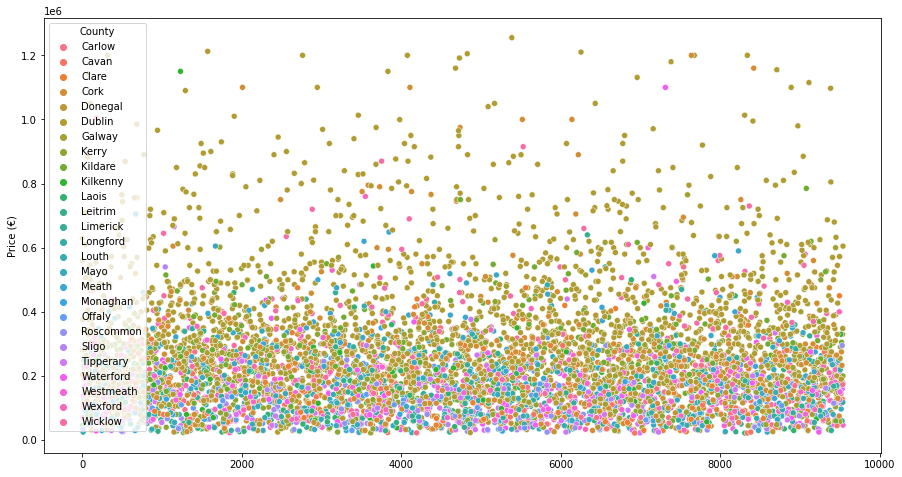

In [27]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='County')


### Description of Property 

<AxesSubplot:xlabel='Description of Property', ylabel='Price (€)'>

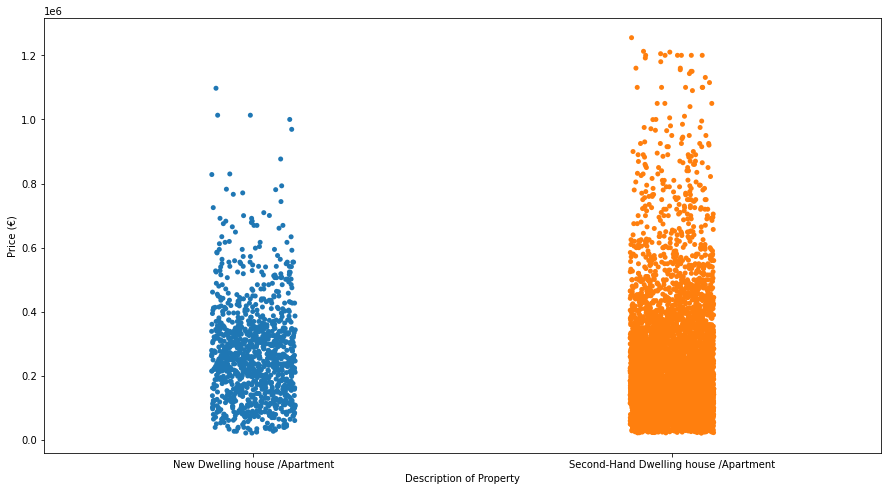

In [28]:
sns.stripplot(x="Description of Property", y="Price (€)", data=train) 


<AxesSubplot:xlabel='Description of Property', ylabel='Price (€)'>

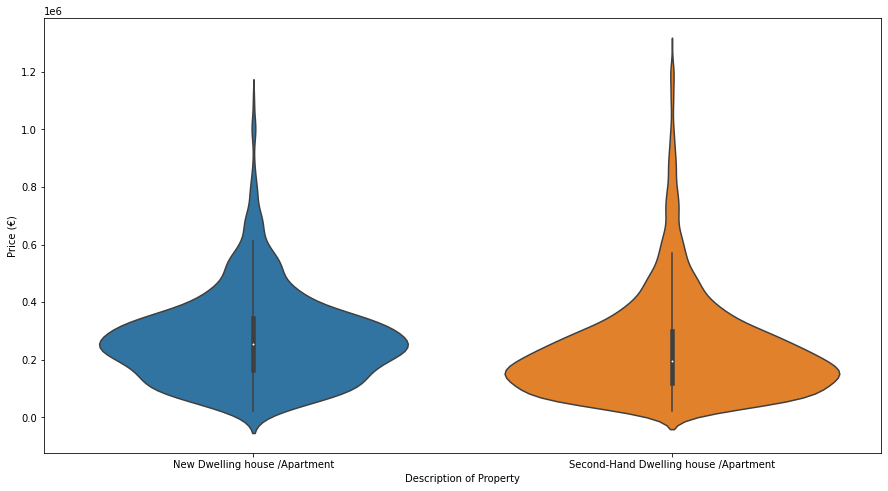

In [29]:
sns.violinplot(x="Description of Property", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

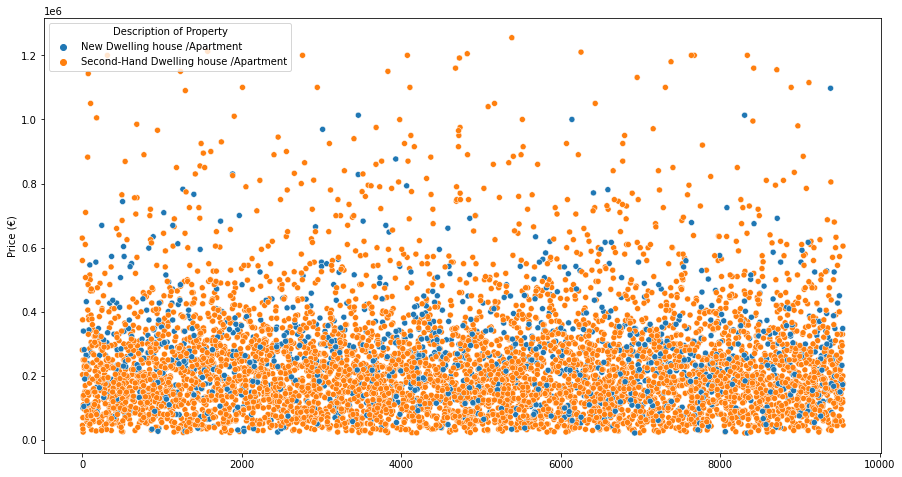

In [30]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Description of Property')


### Property Size Description

<AxesSubplot:xlabel='Property Size Description', ylabel='Price (€)'>

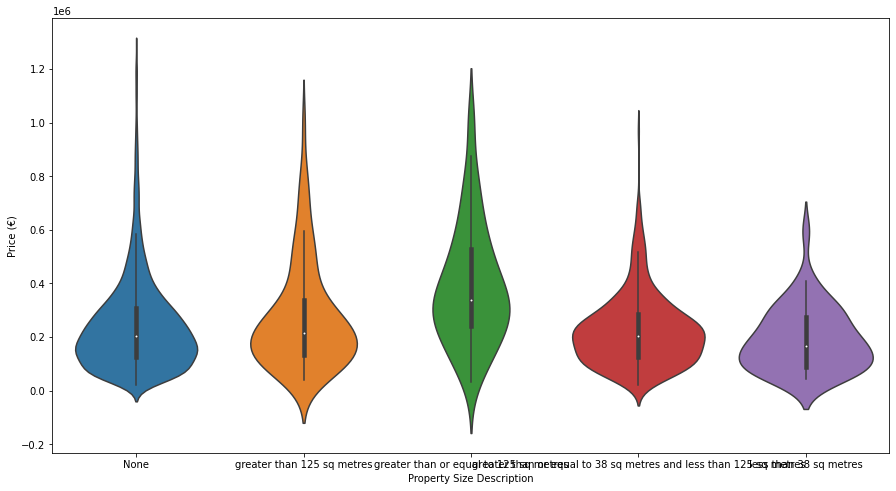

In [31]:
sns.violinplot(x="Property Size Description", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

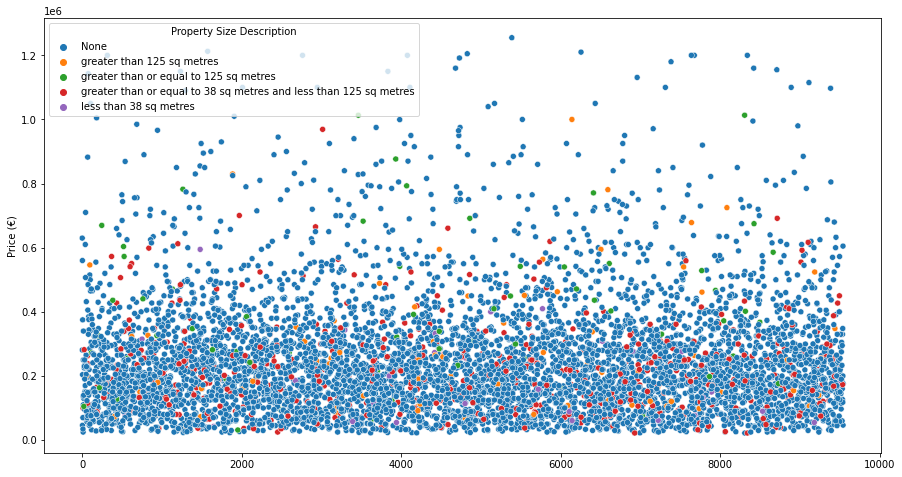

In [32]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Property Size Description')


### Month

<AxesSubplot:xlabel='Month', ylabel='Price (€)'>

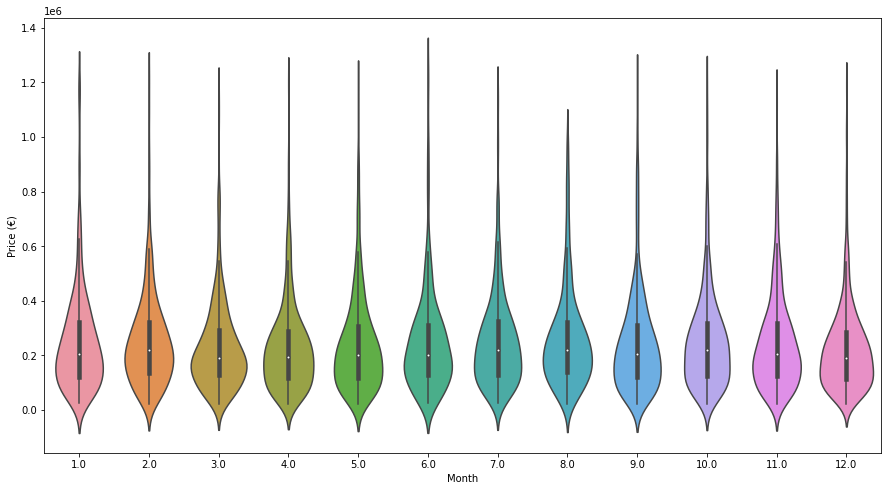

In [33]:
sns.violinplot(x="Month", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

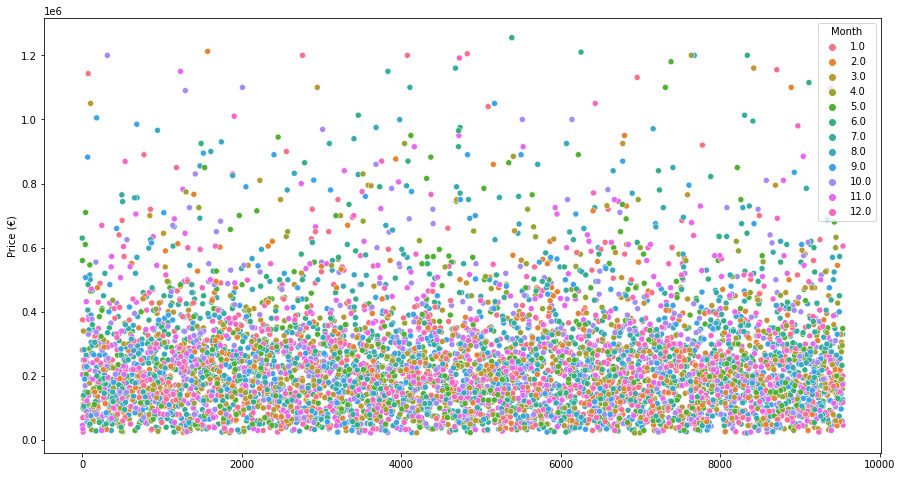

In [34]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Month')


### Year

<AxesSubplot:xlabel='Year', ylabel='Price (€)'>

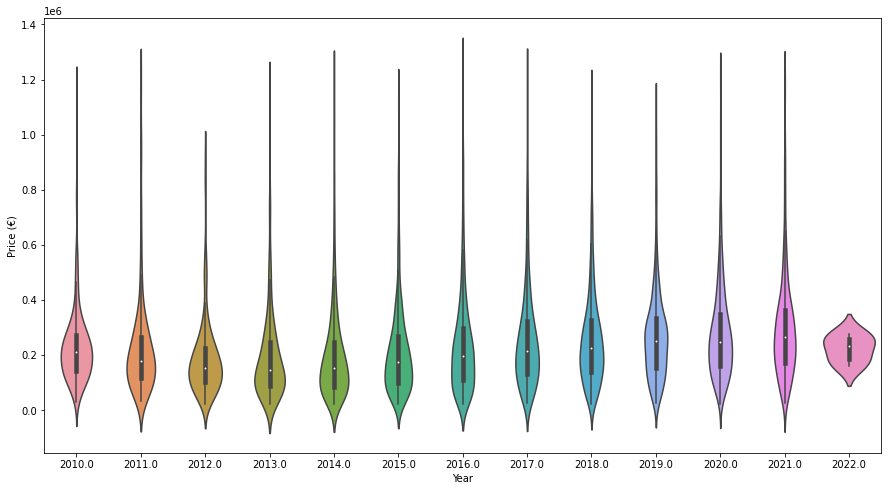

In [35]:
sns.violinplot(x="Year", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

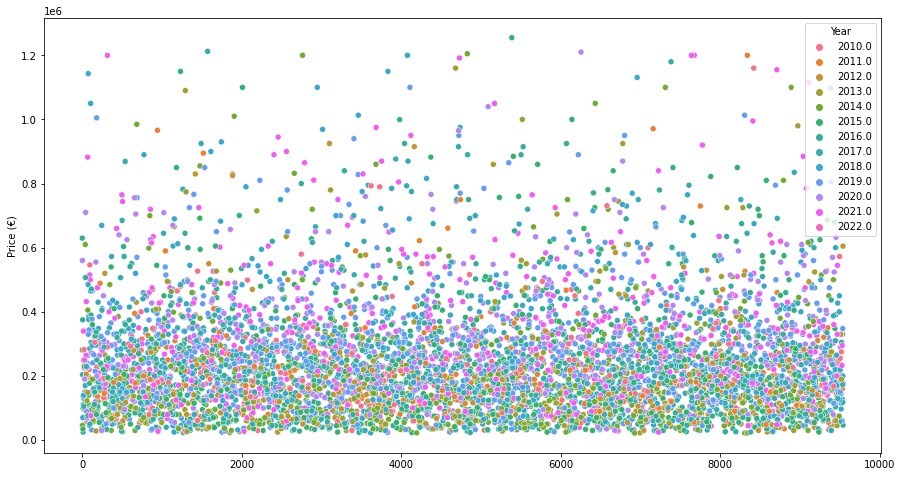

In [36]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Year')


### Province

<AxesSubplot:xlabel='Province', ylabel='Price (€)'>

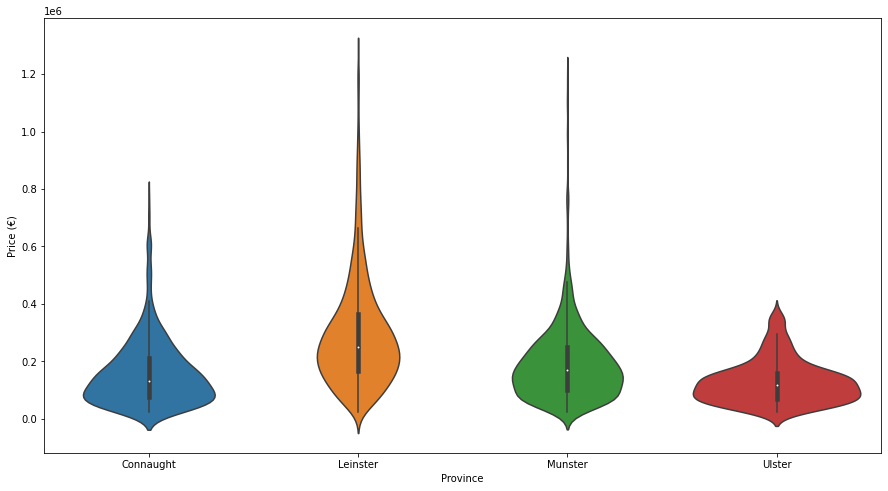

In [37]:
sns.violinplot(x="Province", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

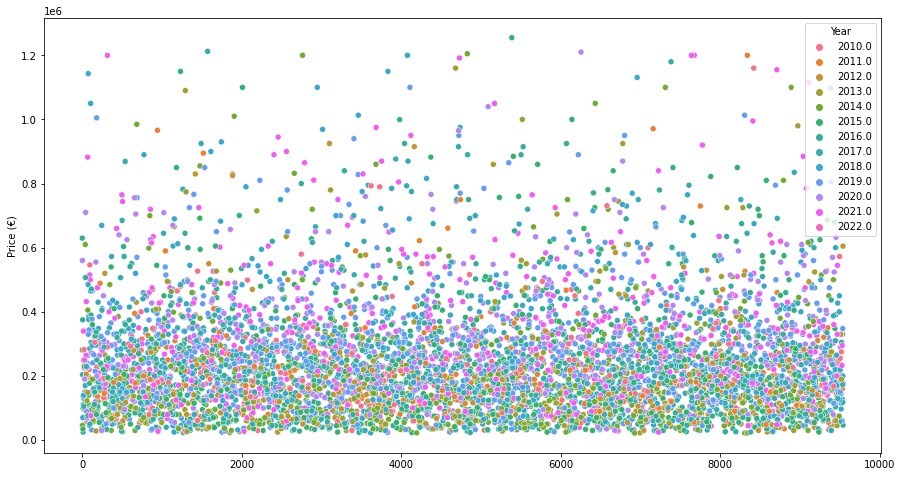

In [38]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Year')


### Season

<AxesSubplot:xlabel='Season', ylabel='Price (€)'>

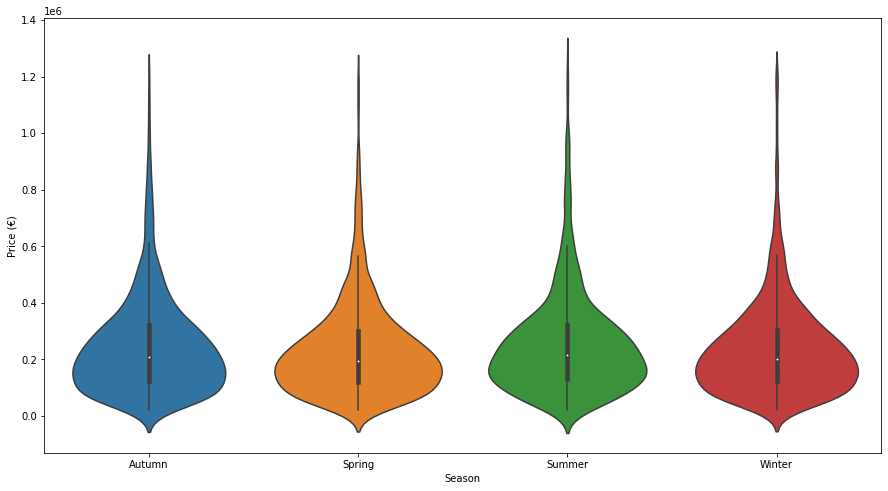

In [39]:
sns.violinplot(x="Season", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

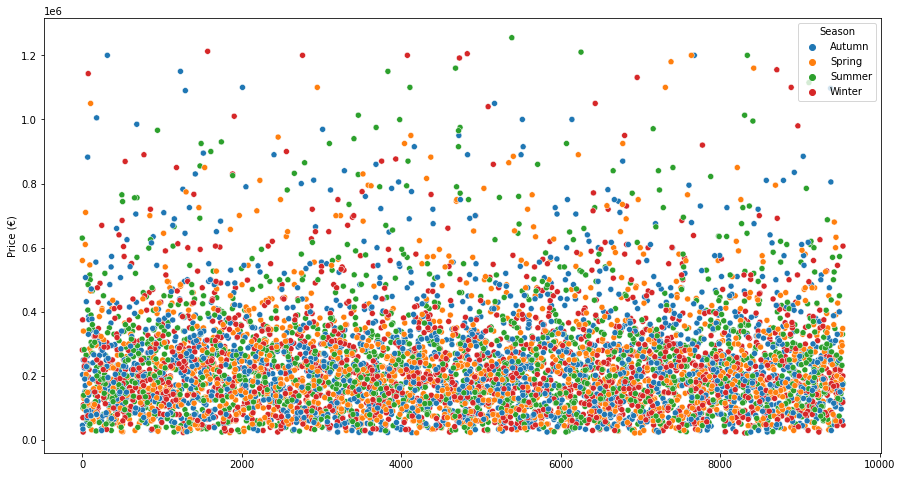

In [40]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Season')


### GDP

<AxesSubplot:xlabel='GDP (USD-Billion)', ylabel='Price (€)'>

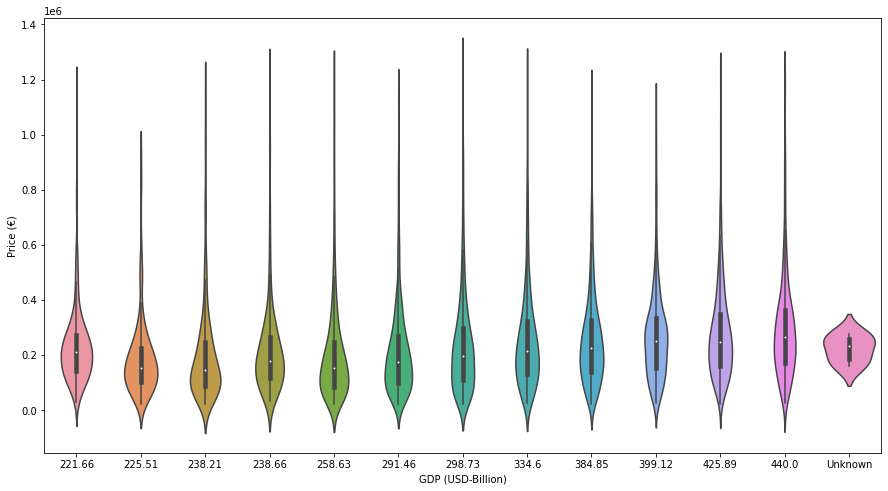

In [41]:



sns.violinplot(x="GDP (USD-Billion)", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

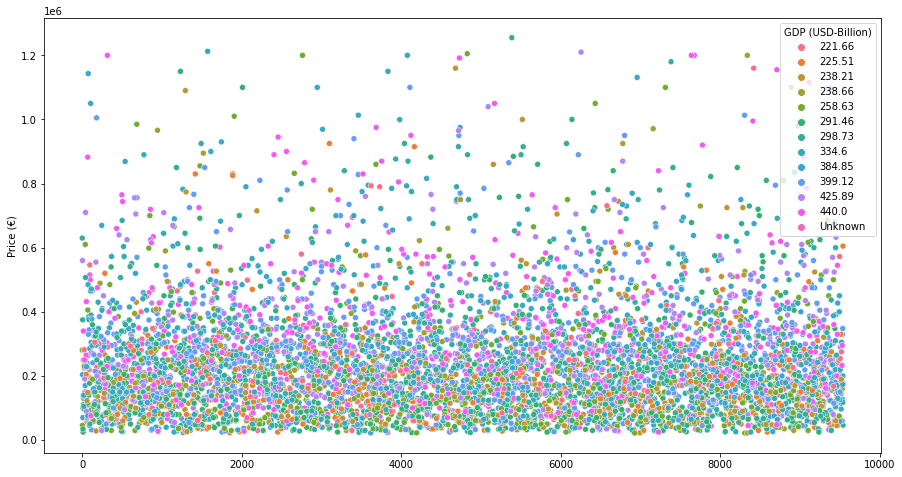

In [42]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='GDP (USD-Billion)')


### Total Number of Loan Approved

<AxesSubplot:xlabel='Total Number of Loans Approved', ylabel='Price (€)'>

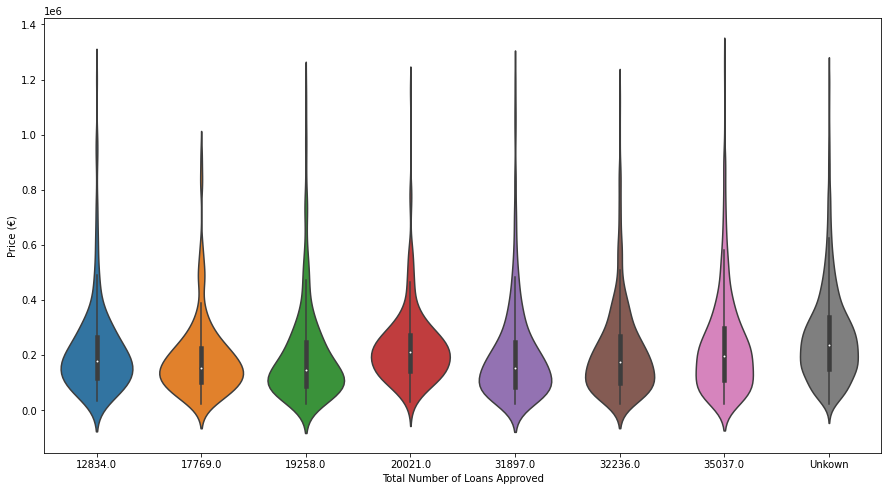

In [43]:
sns.violinplot(x="Total Number of Loans Approved", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

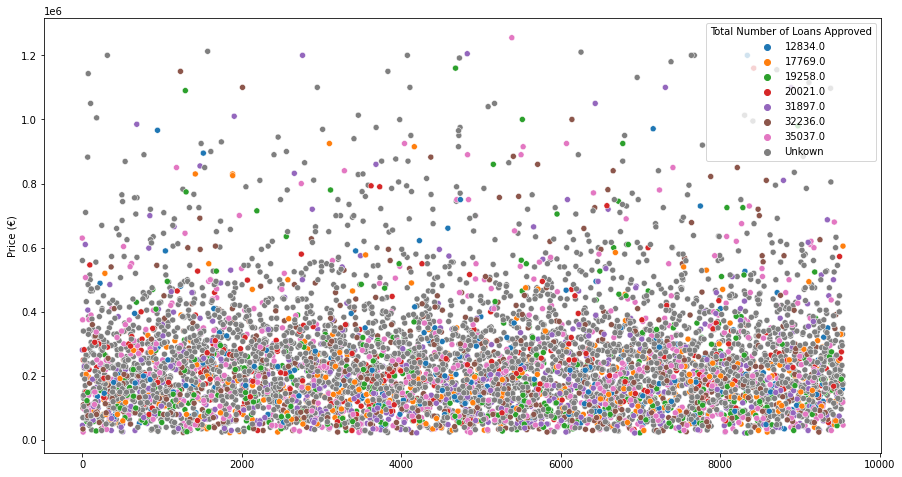

In [44]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Total Number of Loans Approved')



### Added Post Codes

<AxesSubplot:xlabel='Added Post Codes', ylabel='Price (€)'>

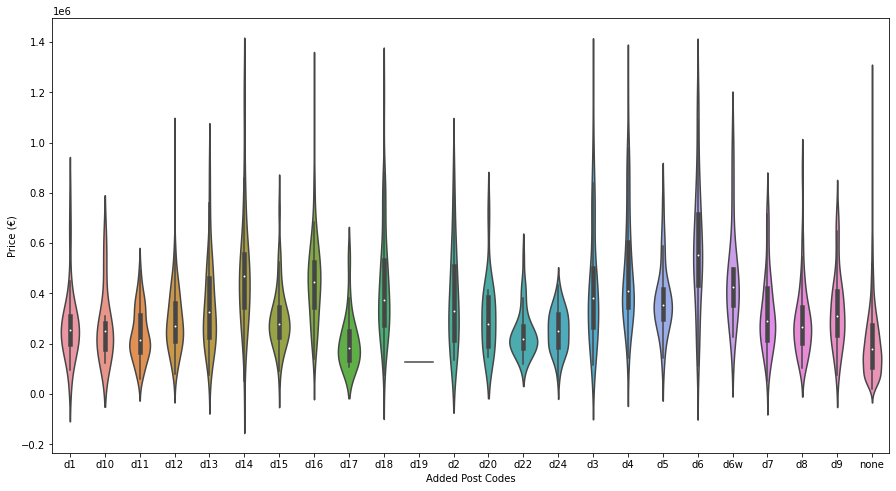

In [45]:
sns.violinplot(x="Added Post Codes", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

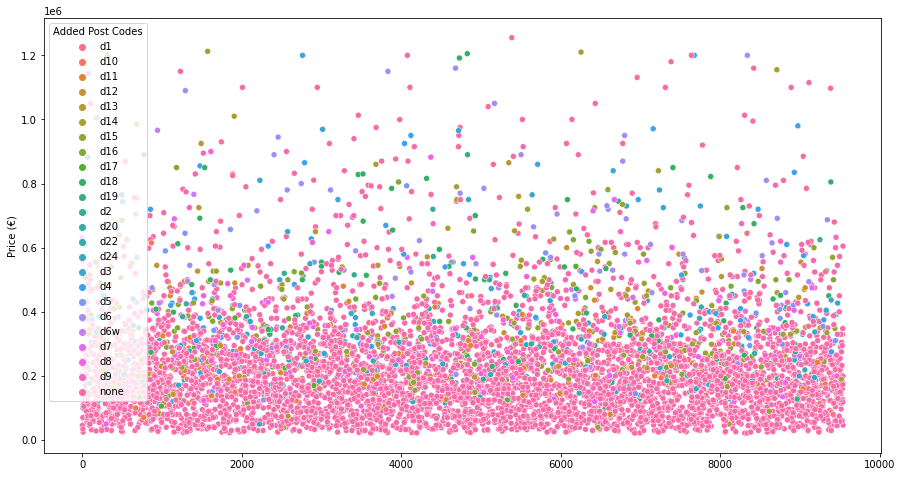

In [46]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Added Post Codes')


In [47]:
CorrelationDataFrame = train.drop('Address', 1)


CorrelationDataFrame['Month'] = train['Month'].astype('int')
CorrelationDataFrame['Year'] = train['Year'].astype('int')





CorrelationDataFrame.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                      int32
Year                                       int32
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

### For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

- There is a very weak correlation between Year and Price. 

In [48]:
CorrelationDataFrame.corr()

Price (€)     Month      Year
Price (€)   1.000000 -0.008989  0.171471
Month      -0.008989  1.000000 -0.023942
Year        0.171471 -0.023942  1.000000

In [49]:
# train = pd.get_dummies(data=train, drop_first=True)

CorrelationDataFrame = pd.get_dummies(data=CorrelationDataFrame, drop_first=True)



In [50]:
CorrelationDataFrame.head(5)

Date of Sale (yyyy/mm/dd)  Price (€)  Month  Year  Postal Code_d10  \
551                 2021-04-01   260000.0      4  2021                0   
4758                2015-05-22   285000.0      5  2015                0   
4358                2016-02-24   101000.0      2  2016                0   
1643                2019-06-18   200000.0      6  2019                0   
3511                2013-11-25   167000.0     11  2013                0   

      Postal Code_d11  Postal Code_d12  Postal Code_d13  Postal Code_d14  \
551                 0                0                0                0   
4758                0                0                0                0   
4358                0                0                0                0   
1643                1                0                0                0   
3511                0                0                0                0   

      Postal Code_d15  ...  Added Post Codes_d24  Added Post Codes_d3  \
551                 0  ...                     0                    0   
4758                0  ...                     0                    0   
4358                0  ...                     0                    0   
1643                0  ...                     0                    0   
3511                0  ...                     0                    0   

      Added Post Codes_d4  Added Post Codes_d5  Added Post Codes_d6  \
551                     0                    0                    0   
4758                    0                    0                    0   
4358                    0                    0                    0   
1643                    0                    0                    0   
3511                    0                    0                    0   

      Added Post Codes_d6w  Added Post Codes_d7  Added Post Codes_d8  \
551                      0                    0                    0   
4758                     0                    0                    0   
4358                     0                    0                    0   
1643                     0                    0                    0   
3511                     0                    0                    0   

      Added Post Codes_d9  Added Post Codes_none  
551                     0                      1  
4758                    0                      1  
4358                    0                      1  
1643                    0                      0  
3511                    0                      1  

[5 rows x 105 columns]

In [51]:
CorrelationDataFrame.corr()

Price (€)     Month      Year  Postal Code_d10  \
Price (€)               1.000000 -0.008989  0.171471         0.009026   
Month                  -0.008989  1.000000 -0.023942        -0.002012   
Year                    0.171471 -0.023942  1.000000         0.019622   
Postal Code_d10         0.009026 -0.002012  0.019622         1.000000   
Postal Code_d11         0.003821  0.008327  0.027163        -0.003917   
...                          ...       ...       ...              ...   
Added Post Codes_d6w    0.057825 -0.014204 -0.021058        -0.001745   
Added Post Codes_d7     0.048283  0.002320 -0.001424        -0.004066   
Added Post Codes_d8     0.035025  0.015059  0.024307        -0.004846   
Added Post Codes_d9     0.055914 -0.019621  0.005751        -0.004295   
Added Post Codes_none  -0.340752  0.018957 -0.026743        -0.075474   

                       Postal Code_d11  Postal Code_d12  Postal Code_d13  \
Price (€)                     0.003821         0.034612         0.061342   
Month                         0.008327        -0.003759        -0.016768   
Year                          0.027163         0.002258         0.003536   
Postal Code_d10              -0.003917        -0.004182        -0.003633   
Postal Code_d11               1.000000        -0.010707        -0.009301   
...                                ...              ...              ...   
Added Post Codes_d6w         -0.004467        -0.004769        -0.004143   
Added Post Codes_d7          -0.010410        -0.011115        -0.009656   
Added Post Codes_d8          -0.012408        -0.013249        -0.011509   
Added Post Codes_d9           0.003203        -0.011741        -0.010199   
Added Post Codes_none        -0.193236        -0.206323        -0.179235   

                       Postal Code_d14  Postal Code_d15  Postal Code_d16  ...  \
Price (€)                     0.130774         0.044726         0.116858  ...   
Month                        -0.006532        -0.020675        -0.019171  ...   
Year                         -0.002882         0.021748         0.030209  ...   
Postal Code_d10              -0.003567        -0.005948        -0.003698  ...   
Postal Code_d11              -0.009132        -0.015229        -0.009467  ...   
...                                ...              ...              ...  ...   
Added Post Codes_d6w         -0.004068        -0.006784        -0.004217  ...   
Added Post Codes_d7          -0.009481        -0.005819        -0.009828  ...   
Added Post Codes_d8          -0.011300        -0.010424        -0.011715  ...   
Added Post Codes_d9          -0.010014        -0.016700        -0.010381  ...   
Added Post Codes_none        -0.175978        -0.293468        -0.182436  ...   

                       Added Post Codes_d24  Added Post Codes_d3  \
Price (€)                          0.005926             0.101730   
Month                              0.014768            -0.016768   
Year                               0.007926             0.003001   
Postal Code_d10                   -0.004512            -0.003633   
Postal Code_d11                   -0.011553            -0.009301   
...                                     ...                  ...   
Added Post Codes_d6w              -0.005146            -0.004143   
Added Post Codes_d7               -0.011994            -0.009656   
Added Post Codes_d8               -0.014296            -0.011509   
Added Post Codes_d9               -0.012669            -0.010199   
Added Post Codes_none             -0.222631            -0.179235   

                       Added Post Codes_d4  Added Post Codes_d5  \
Price (€)                         0.152341             0.069717   
Month                            -0.019274             0.033191   
Year                              0.011899             0.020510   
Postal Code_d10                  -0.004153            -0.003567   
Postal Code_d11                  -0.010634            -0.009132   
...                                    ..

In [52]:
monthAndPrice = train[['Price (€)', 'Month']].copy()

YearAndPrice = train[['Price (€)', 'Year']].copy()

PostcodeAndPrice = train[['Price (€)', 'Added Post Codes']].copy()




In [53]:
monthAndPrice = pd.get_dummies(data=monthAndPrice, drop_first=True)
monthAndPrice.corr()


Price (€)  Month_2.0  Month_3.0  Month_4.0  Month_5.0  Month_6.0  \
Price (€)    1.000000   0.010727  -0.020552  -0.026036  -0.003282   0.008756   
Month_2.0    0.010727   1.000000  -0.075328  -0.075244  -0.080532  -0.075992   
Month_3.0   -0.020552  -0.075328   1.000000  -0.080630  -0.086297  -0.081431   
Month_4.0   -0.026036  -0.075244  -0.080630   1.000000  -0.086201  -0.081341   
Month_5.0   -0.003282  -0.080532  -0.086297  -0.086201   1.000000  -0.087057   
Month_6.0    0.008756  -0.075992  -0.081431  -0.081341  -0.087057   1.000000   
Month_7.0    0.017133  -0.081325  -0.087146  -0.087050  -0.093167  -0.087914   
Month_8.0    0.030406  -0.080453  -0.086211  -0.086116  -0.092168  -0.086971   
Month_9.0   -0.001513  -0.079654  -0.085356  -0.085261  -0.091253  -0.086108   
Month_10.0   0.013794  -0.084832  -0.090904  -0.090804  -0.097185  -0.091706   
Month_11.0   0.007830  -0.084447  -0.090492  -0.090392  -0.096744  -0.091289   
Month_12.0  -0.044917  -0.092689  -0.099323  -0.099214  -0.106186  -0.100199   

            Month_7.0  Month_8.0  Month_9.0  Month_10.0  Month_11.0  \
Price (€)    0.017133   0.030406  -0.001513    0.013794    0.007830   
Month_2.0   -0.081325  -0.080453  -0.079654   -0.084832   -0.084447   
Month_3.0   -0.087146  -0.086211  -0.085356   -0.090904   -0.090492   
Month_4.0   -0.087050  -0.086116  -0.085261   -0.090804   -0.090392   
Month_5.0   -0.093167  -0.092168  -0.091253   -0.097185   -0.096744   
Month_6.0   -0.087914  -0.086971  -0.086108   -0.091706   -0.091289   
Month_7.0    1.000000  -0.093075  -0.092151   -0.098142   -0.097696   
Month_8.0   -0.093075   1.000000  -0.091163   -0.097089   -0.096648   
Month_9.0   -0.092151  -0.091163   1.000000   -0.096125   -0.095689   
Month_10.0  -0.098142  -0.097089  -0.096125    1.000000   -0.101909   
Month_11.0  -0.097696  -0.096648  -0.095689   -0.101909    1.000000   
Month_12.0  -0.107231  -0.106081  -0.105028   -0.111855   -0.111348   

            Month_12.0  
Price (€)    -0.044917  
Month_2.0    -0.092689  
Month_3.0    -0.099323  
Month_4.0    -0.099214  
Month_5.0    -0.106186  
Month_6.0    -0.100199  
Month_7.0    -0.107231  
Month_8.0    -0.106081  
Month_9.0    -0.105028  
Month_10.0   -0.111855  
Month_11.0   -0.111348  
Month_12.0    1.000000

In [54]:
YearAndPrice = pd.get_dummies(data=YearAndPrice, drop_first=True)
YearAndPrice.corr()

Price (€)  Year_2011.0  Year_2012.0  Year_2013.0  Year_2014.0  \
Price (€)     1.000000    -0.028778    -0.071530    -0.067468    -0.073977   
Year_2011.0  -0.028778     1.000000    -0.042414    -0.047738    -0.056962   
Year_2012.0  -0.071530    -0.042414     1.000000    -0.056891    -0.067883   
Year_2013.0  -0.067468    -0.047738    -0.056891     1.000000    -0.076405   
Year_2014.0  -0.073977    -0.056962    -0.067883    -0.076405     1.000000   
Year_2015.0  -0.061079    -0.063856    -0.076100    -0.085654    -0.102202   
Year_2016.0  -0.019767    -0.060197    -0.071739    -0.080745    -0.096345   
Year_2017.0   0.022871    -0.063273    -0.075405    -0.084871    -0.101268   
Year_2018.0   0.029796    -0.068316    -0.081414    -0.091635    -0.109339   
Year_2019.0   0.052553    -0.068621    -0.081777    -0.092044    -0.109827   
Year_2020.0   0.058992    -0.061774    -0.073618    -0.082860    -0.098869   
Year_2021.0   0.110920    -0.064909    -0.077354    -0.087065    -0.103886   
Year_2022.0  -0.003170    -0.005215    -0.006215    -0.006996    -0.008347   

             Year_2015.0  Year_2016.0  Year_2017.0  Year_2018.0  Year_2019.0  \
Price (€)      -0.061079    -0.019767     0.022871     0.029796     0.052553   
Year_2011.0    -0.063856    -0.060197    -0.063273    -0.068316    -0.068621   
Year_2012.0    -0.076100    -0.071739    -0.075405    -0.081414    -0.081777   
Year_2013.0    -0.085654    -0.080745    -0.084871    -0.091635    -0.092044   
Year_2014.0    -0.102202    -0.096345    -0.101268    -0.109339    -0.109827   
Year_2015.0     1.000000    -0.108007    -0.113526    -0.122574    -0.123121   
Year_2016.0    -0.108007     1.000000    -0.107021    -0.115549    -0.116065   
Year_2017.0    -0.113526    -0.107021     1.000000    -0.121454    -0.121997   
Year_2018.0    -0.122574    -0.115549    -0.121454     1.000000    -0.131719   
Year_2019.0    -0.123121    -0.116065    -0.121997    -0.131719     1.000000   
Year_2020.0    -0.110836    -0.104485    -0.109824    -0.118576    -0.119106   
Year_2021.0    -0.116461    -0.109787    -0.115397    -0.124594    -0.125150   
Year_2022.0    -0.009358    -0.008821    -0.009272    -0.010011    -0.010056   

             Year_2020.0  Year_2021.0  Year_2022.0  
Price (€)       0.058992     0.110920    -0.003170  
Year_2011.0    -0.061774    -0.064909    -0.005215  
Year_2012.0    -0.073618    -0.077354    -0.006215  
Year_2013.0    -0.082860    -0.087065    -0.006996  
Year_2014.0    -0.098869    -0.103886    -0.008347  
Year_2015.0    -0.110836    -0.116461    -0.009358  
Year_2016.0    -0.104485    -0.109787    -0.008821  
Year_2017.0    -0.109824    -0.115397    -0.009272  
Year_2018.0    -0.118576    -0.124594    -0.010011  
Year_2019.0    -0.119106    -0.125150    -0.010056  
Year_2020.0     1.000000    -0.112663    -0.009053  
Year_2021.0    -0.112663     1.000000    -0.009512  
Year_2022.0    -0.009053    -0.009512     1.000000

In [55]:
PostcodeAndPrice = pd.get_dummies(data=PostcodeAndPrice, drop_first=True)
PostcodeAndPrice.corr()

Price (€)  Added Post Codes_d10  Added Post Codes_d11  \
Price (€)               1.000000              0.007183             -0.002953   
Added Post Codes_d10    0.007183              1.000000             -0.004736   
Added Post Codes_d11   -0.002953             -0.004736              1.000000   
Added Post Codes_d12    0.033783             -0.004766             -0.012292   
Added Post Codes_d13    0.063181             -0.004390             -0.011322   
Added Post Codes_d14    0.142994             -0.004258             -0.010981   
Added Post Codes_d15    0.053543             -0.006717             -0.017323   
Added Post Codes_d16    0.114464             -0.004016             -0.010357   
Added Post Codes_d17   -0.009527             -0.002250             -0.005803   
Added Post Codes_d18    0.143690             -0.005471             -0.014110   
Added Post Codes_d19   -0.008204             -0.000530             -0.001366   
Added Post Codes_d2     0.052622             -0.002758             -0.007112   
Added Post Codes_d20    0.019173             -0.002186             -0.005639   
Added Post Codes_d22   -0.000083             -0.003402             -0.008773   
Added Post Codes_d24    0.005926             -0.004944             -0.012751   
Added Post Codes_d3     0.101730             -0.003980             -0.010265   
Added Post Codes_d4     0.152341             -0.004550             -0.011736   
Added Post Codes_d5     0.069717             -0.003908             -0.010079   
Added Post Codes_d6     0.212408             -0.004613             -0.011897   
Added Post Codes_d6w    0.057825             -0.001911             -0.004930   
Added Post Codes_d7     0.048283             -0.004455             -0.011489   
Added Post Codes_d8     0.035025             -0.005310             -0.013694   
Added Post Codes_d9     0.055914             -0.004705             -0.012135   
Added Post Codes_none  -0.340752             -0.082690             -0.213262   

                       Added Post Codes_d12  Added Post Codes_d13  \
Price (€)                          0.033783              0.063181   
Added Post Codes_d10              -0.004766             -0.004390   
Added Post Codes_d11              -0.012292             -0.011322   
Added Post Codes_d12               1.000000             -0.011394   
Added Post Codes_d13              -0.011394              1.000000   
Added Post Codes_d14              -0.011051             -0.010179   
Added Post Codes_d15              -0.017434             -0.016058   
Added Post Codes_d16              -0.010423             -0.009601   
Added Post Codes_d17              -0.005840             -0.005379   
Added Post Codes_d18              -0.014200             -0.013079   
Added Post Codes_d19              -0.001375             -0.001266   
Added Post Codes_d2               -0.007157             -0.006593   
Added Post Codes_d20              -0.005675             -0.005227   
Added Post Codes_d22              -0.008829             -0.008133   
Added Post Codes_d24              -0.012832             -0.011820   
Added Post Codes_d3               -0.010331             -0.009516   
Added Post Codes_d4               -0.011811             -0.010879   
Added Post Codes_d5               -0.010143             -0.009343   
Added Post Codes_d6               -0.011973             -0.011028   
Added Post Codes_d6w              -0.004961             -0.004570   
Added Post Codes_d7               -0.011563             -0.010650   
Added Post Codes_d8               -0.013782             -0.012694   
Added Post Codes_d9               -0.012213             -0.011249   
Added Post Codes_none             -0.214624             -0.197690   

                       Added Post Codes_d14  Added Post Codes_d15  \
Price (€)                          0.142994              0.053543   
Added Post Codes_d10              -0.004258             -0.006717   
Added Post Codes_d11              -0.010981             -0.017323   
Added Post Codes_d12

## (2). Predictive Modeling and Evaluation: Linear Regression.

#### (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above.

In [56]:

train_feature = ["County","Description of Property","Year", "Month","Season", "Province", "Added Post Codes"]
target_feature1 = ['Price (€)']

train = df[train_feature]
target = df[target_feature1]


train = pd.get_dummies(data=train, drop_first=True)
train.head()

# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state=1)


County_Cavan  County_Clare  County_Cork  County_Donegal  County_Dublin  \
0             0             0            0               0              1   
1             0             0            0               0              1   
2             0             0            0               0              1   
3             0             0            0               0              0   
4             0             1            0               0              0   

   County_Galway  County_Kerry  County_Kildare  County_Kilkenny  County_Laois  \
0              0             0               0                0             0   
1              0             0               0                0             0   
2              0             0               0                0             0   
3              0             0               0                1             0   
4              0             0               0                0             0   

   ...  Added Post Codes_d24  Added Post Codes_d3  Added Post Codes_d4  \
0  ...                     0                    0                    0   
1  ...                     0                    0                    0   
2  ...                     0                    0                    0   
3  ...                     0                    0                    0   
4  ...                     0                    0                    0   

   Added Post Codes_d5  Added Post Codes_d6  Added Post Codes_d6w  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   Added Post Codes_d7  Added Post Codes_d8  Added Post Codes_d9  \
0                    0                    1                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Added Post Codes_none  
0                      0  
1                      0  
2                      1  
3                      1  
4                      1  

[5 rows x 78 columns]

In [57]:
train.dtypes

County_Cavan             uint8
County_Clare             uint8
County_Cork              uint8
County_Donegal           uint8
County_Dublin            uint8
                         ...  
Added Post Codes_d6w     uint8
Added Post Codes_d7      uint8
Added Post Codes_d8      uint8
Added Post Codes_d9      uint8
Added Post Codes_none    uint8
Length: 78, dtype: object

In [58]:
train.isnull().values.any()


False

In [59]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train,target,test_size=0.3, random_state=1)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(6547, 78)
(2806, 78)
(6547, 1)
(2806, 1)


### Trainnig the Linear Regression Model 

In [60]:
LR = LinearRegression().fit(Xtrain,Ytrain)
LR

LinearRegression()

In [61]:
print("Features: \n", Xtrain)
print("Coeficients: \n", LR.coef_)
print("\nIntercept: \n", LR.intercept_)

Features: 
       County_Cavan  County_Clare  County_Cork  County_Donegal  County_Dublin  \
551              0             0            0               0              0   
4758             0             0            0               0              1   
4358             0             0            0               0              0   
1643             0             0            0               0              1   
3511             0             0            0               0              0   
...            ...           ...          ...             ...            ...   
2972             0             0            0               0              1   
7975             0             0            0               0              1   
925              0             0            0               0              1   
5312             0             0            0               0              1   
237              0             0            0               0              0   

      County_Galway  County

In [62]:
print(train_feature)

['County', 'Description of Property', 'Year', 'Month', 'Season', 'Province', 'Added Post Codes']


In [63]:
# feature_importance = pd.DataFrame({'feature': train, 'importance':LR.coef_})


In [64]:
predictions = LR.predict(Xtest)
predictions

array([[138648.],
       [401104.],
       [266896.],
       ...,
       [216216.],
       [312672.],
       [119456.]])

<AxesSubplot:xlabel='Price (€)'>

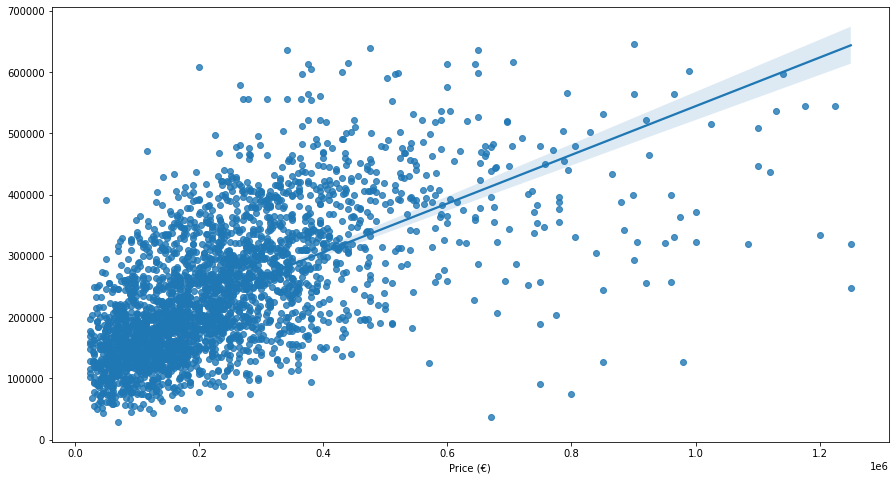

In [65]:
sns.regplot(Ytest,predictions)


In [62]:
X_train_Sm= sm.add_constant(Xtrain)
X_train_Sm= sm.add_constant(Xtrain)
ls=sm.OLS(Ytrain,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              Price (€)   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     57.47
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:28:59   Log-Likelihood:                -86657.
No. Observations:                6547   AIC:                         1.735e+05
Df Residuals:                    6474   BIC:                         1.740e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### (2.2) Interpetation of the linear regression model

#### (2.3) Print the predicted target feature value for the first 10 training examples.

In [91]:
LR_training_data_predictions =LR.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(LR_training_data_predictions, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)  Predicted
551    260000.0   202040.0
4758   285000.0   341936.0
4358   101000.0   120360.0
1643   200000.0   265536.0
3511   167000.0   125104.0
4552   115000.0   442576.0
6224   269000.0   293760.0
3159   250850.0   352424.0
5699   212000.0   285400.0
9246    31500.0    79944.0


#### Function for computing evaluation metrics

In [92]:
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
    print('\n====================')

    
    


#### Regression Evaluation Measures Linear Regression

In [93]:
printMetrics(Ytrain, LR_training_data_predictions)



MAE:  93041.26522223919
RMSE:  135563.29202038015
R2:  0.38988806238847495



#### (2.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set

#### Training Data Linear regression

In [94]:
LR_training_data_predictions =LR.predict(Xtrain)


Train_ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(LR_training_data_predictions, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(Train_ActualVPredicted.head(10))

      Price (€)  Predicted
551    260000.0   202040.0
4758   285000.0   341936.0
4358   101000.0   120360.0
1643   200000.0   265536.0
3511   167000.0   125104.0
4552   115000.0   442576.0
6224   269000.0   293760.0
3159   250850.0   352424.0
5699   212000.0   285400.0
9246    31500.0    79944.0


#### Test Data Linear regression

In [96]:
LRtest_data_predictions =LR.predict(Xtest)


Test_ActualVPredicted = pd.concat([Ytest, pd.DataFrame(LRtest_data_predictions, columns=['Predicted'], index=Xtest.index)], axis=1)
print(Test_ActualVPredicted.head(10))

      Price (€)  Predicted
841    75000.00   138648.0
7603  215859.00   401104.0
82    260000.00   266896.0
3168  195000.00   120256.0
4699  170000.00   196632.0
5821  121000.00   136848.0
8798  206452.59   271896.0
6903  315000.00   342096.0
2092  171285.00    76416.0
2639  281000.00   334848.0


#### Looking at evaluations metrics for Test data and Train data linear regression

In [97]:
print("________ Test Data ________")
printMetrics(Ytest, LRtest_data_predictions)
print("\n________ Train Data ________")
printMetrics(Ytrain, LR_training_data_predictions)

________ Test Data ________


MAE:  91943.30857091946
RMSE:  133511.62388593203
R2:  0.37871565056588774


________ Train Data ________


MAE:  93041.26522223919
RMSE:  135563.29202038015
R2:  0.38988806238847495



#### Comparing results with cross validated model 

#### Mean Squared Error

In [148]:
X = df[train_feature]
X = pd.get_dummies(X)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LinearRegression()

#use k-fold CV to evaluate model
scoresMSE = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
resultMSE_LR = mean(absolute(scoresMSE))

resultMSE_LR




5915346818975.057

#### Root Mean Squared Error

In [149]:

model = LinearRegression()

scoresRMSE = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
resultRMSE_LR = sqrt(mean(absolute(scoresRMSE)))

resultRMSE_LR

571986806139026.0

#### R Squared Error

In [150]:

cv = KFold(n_splits=3, random_state=1, shuffle=True)

scoresR2 = cross_val_score(model, X, y, scoring=make_scorer(r2_score),
                         cv=cv, n_jobs=-1)
print(scoresR2)
resultR2_LR = mean(absolute(scoresR2))

resultR2_LR

[ 3.80370357e-01  3.90841998e-01 -1.26686177e+22]


4.222872557266799e+21

#### Putting Results into Data frame 

In [151]:
linRegResults = {"MSE": resultMSE_LR,
  "RMSE": resultRMSE_LR, "R2": resultR2_LR}

LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])

LinRegDF

Linear_Regression
MSE        5.915347e+12
RMSE       5.719868e+14
R2         4.222873e+21

## (3). **Predictive Modeling and Evaluation:** Decision Tree.  


#### - (3.1) On the training set, train a decision tree model to predict the target feature, using the descriptive features selected in exercise (1) above. 

In [156]:
DTR = tree.DecisionTreeRegressor().fit(Xtrain,Ytrain )
DTR

DecisionTreeRegressor()

In [160]:
Train_predictions_DTR = DTR.predict(Xtrain)
Train_predictions_DTR

array([260000., 423750., 101000., ..., 364175., 520000., 224000.])

In [161]:
for importance, name in sorted(zip(DTR.feature_importances_, Xtrain.columns),reverse=True):
 print (name, importance)

County_Dublin 0.2994931750737463
Description of Property_Second-Hand Dwelling house /Apartment 0.04067260029510247
Added Post Codes_d6 0.02740867436545155
Month_2.0 0.025398586519787877
Month_6.0 0.02347654948798689
Year_2021.0 0.023124139799904936
Month_9.0 0.02199083593522496
County_Wicklow 0.021279337933431074
Year_2019.0 0.020494032089622444
Month_12.0 0.019928316380729057
Month_10.0 0.019042765766753286
Season_Winter 0.01882552110361938
Month_11.0 0.018717372201619495
County_Cork 0.01817639971685253
Year_2017.0 0.018065464971250347
Month_7.0 0.017689971648294413
County_Kildare 0.017494829293864138
Year_2012.0 0.01699568740996833
Year_2016.0 0.016460354223003855
Year_2013.0 0.016281930968644137
Year_2015.0 0.015658555058255696
Season_Summer 0.015338284254373431
Month_8.0 0.014946326903720887
Month_3.0 0.014386730998469328
Year_2014.0 0.014345367430425601
Month_5.0 0.01349809247197576
Year_2020.0 0.011662601970153749
Year_2018.0 0.01155740403763641
County_Meath 0.011470846359134543


In [167]:
text_representation = tree.export_text(DTR)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_24 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_34 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_53 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 29
|   |   |   |   |   |   |   |   |   |   |--- feature_53 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |--- feature_33 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_52 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- feature_52 >  0.50
|   |   |   |   |   |   |   |   | 

In [173]:
import pydot



dot_data = tree.export_graphviz(DTR, out_file=None, 
                                feature_names=Xtrain.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

NameError: name 'graphviz' is not defined

In [176]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTR, feature_names=Xtrain.columns, filled=True)

Error in callback <function flush_figures at 0x000001B600532E50> (for post_execute):


KeyboardInterrupt: 

#### (3.2) Can you interpret the decision tree model? Discuss any knowledge you can gain in regard of the working of this model. 

#### (3.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.

In [162]:
ActualVPredicted_DTR = pd.concat([Ytrain, pd.DataFrame(Train_predictions_DTR, columns=['Predicted'],index=Xtrain.index)], axis=1)
print(ActualVPredicted_DTR.head(10))

      Price (€)  Predicted
551    260000.0   260000.0
4758   285000.0   423750.0
4358   101000.0   101000.0
1643   200000.0   272500.0
3511   167000.0   103250.0
4552   115000.0   311250.0
6224   269000.0   258000.0
3159   250850.0   250850.0
5699   212000.0   212000.0
9246    31500.0    38500.0


#### (3.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.

In [163]:
Train_predictions_DTR = DTR.predict(Xtrain)
Train_predictions_DTR

array([260000., 423750., 101000., ..., 364175., 520000., 224000.])

In [164]:
print("________ Test Data ________")
printMetrics(Ytest, Test_predictions_DTR)
print("\n________ Train Data ________")
printMetrics(Ytrain, Train_predictions_DTR)


________ Test Data ________


MAE:  118129.86512861657
RMSE:  171886.23350213768
R2:  -0.029756275705548063


________ Train Data ________


MAE:  49399.755622143486
RMSE:  91160.4602559473
R2:  0.7241084954391361



#### Cross Validation Decision Tree 

- Here cross validation is implemented on the Decision tree model. 

#### Mean Squared Error 

In [165]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#use k-fold CV to evaluate model
DTscoresMSE = cross_val_score(DecisionTreeRegressor(), X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
resultMSE_DT = mean(absolute(DTscoresMSE))

resultMSE_DT



119114.70941944276

#### Root Mean Squared Error

In [122]:
DTscoresRMSE = cross_val_score(DecisionTreeRegressor(), X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
resultRMSE_DT = sqrt(mean(absolute(DTscoresRMSE)))

resultRMSE_DT

173109.68478397102

#### R Squared 

In [125]:
DTscoresR2 = cross_val_score(DecisionTreeRegressor(), X, y, scoring=make_scorer(r2_score),
                         cv=cv, n_jobs=-1)
resultR2_DT = mean(absolute(DTscoresR2))

resultR2_DT

0.021186612333884785

### Putting Results into a data frame 

In [137]:
DTResults = {"MSE": resultMSE_DT,
  "RMSE": resultRMSE_DT, "R2": resultR2_DT}

DT_DF = pd.DataFrame.from_dict(DTResults, orient='index', columns=['Decision Tree'])

DT_DF

Decision Tree
MSE   118032.644458
RMSE  173109.684784
R2         0.021187

## (4).  **Predictive Modeling and Evaluation:** Random Forest.  


#### (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   

In [86]:
random_forest = RandomForestRegressor(random_state=0)
random_forest = random_forest.fit(Xtrain,Ytrain)

In [87]:
train_prediction_RF =  random_forest.predict(Xtrain)
train_prediction_RF

array([236917.118     , 417421.11688312, 160132.        , ...,
       364338.27333333, 516633.61      , 213394.        ])

In [88]:
printMetrics(Ytrain, train_prediction_RF)



MAE:  62675.08979778963
RMSE:  97286.57545961744
R2:  0.6857819408895053



#### (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain in regard of the working of this model.

#### Looking at the importance of each feature

In [89]:
for importance, name in sorted(zip(random_forest.feature_importances_, Xtrain.columns),reverse=True):
 print (name, importance)

County_Dublin 0.2708985841653462
Description of Property_Second-Hand Dwelling house /Apartment 0.03911136183157693
Year_2021.0 0.02592582148568078
Added Post Codes_d6 0.025342542149293344
Season_Winter 0.023214806980357907
Month_9.0 0.02210707853544405
Month_10.0 0.02124685941565763
Month_11.0 0.021132478281477414
Month_6.0 0.0207880226730411
Year_2014.0 0.020263900358794797
Year_2017.0 0.01976809750179282
County_Wicklow 0.019625627519242628
Year_2016.0 0.019487852996078445
Year_2019.0 0.019099992869750757
Year_2015.0 0.01896761630893558
Month_12.0 0.01890897460244323
Year_2013.0 0.018756637148171686
Month_7.0 0.01864273429948141
Year_2018.0 0.018466535916450446
Month_2.0 0.018063516710177113
Month_8.0 0.01716299631069869
County_Kildare 0.016956442708241273
Year_2020.0 0.016673016403857942
Year_2012.0 0.01627890877821304
County_Cork 0.015887917647613364
Season_Summer 0.01461814224247625
Month_5.0 0.014088896443414396
Month_3.0 0.012987259599106281
Season_Spring 0.012757174737392374
Mon

 #### (4.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.

In [117]:
train_prediction_RF =  random_forest.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(train_prediction_RF, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)      Predicted
551    260000.0  236917.118000
4758   285000.0  417421.116883
4358   101000.0  160132.000000
1643   200000.0  268111.233500
3511   167000.0  106843.261905
4552   115000.0  339565.000000
6224   269000.0  258158.179487
3159   250850.0  269956.388028
5699   212000.0  227045.666667
9246    31500.0   43822.166667


In [91]:
printMetrics(Ytrain, train_prediction_RF)



MAE:  62675.08979778963
RMSE:  97286.57545961744
R2:  0.6857819408895053



#### (4.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and to the random forest out-of-sample error and discuss your findings.

In [92]:
test_prediction_RF =  random_forest.predict(Xtest)


print("________ Test Data ________")
printMetrics(Ytest, test_prediction_RF)
print("\n________ Train Data ________")
printMetrics(Ytrain, train_prediction_RF)


________ Test Data ________


MAE:  103806.9166937207
RMSE:  150319.70640607533
R2:  0.212439193782607


________ Train Data ________


MAE:  62675.08979778963
RMSE:  97286.57545961744
R2:  0.6857819408895053



In [118]:
ActualVPredicted = pd.concat([Ytest, pd.DataFrame(test_prediction_RF, columns=['Predicted'], index=Xtest.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)      Predicted
841    75000.00  111337.857143
7603  215859.00  651961.768072
82    260000.00  127878.828036
3168  195000.00   99854.680000
4699  170000.00  177409.108067
5821  121000.00  102031.625000
8798  206452.59  248696.749762
6903  315000.00  311372.739733
2092  171285.00   65549.712222
2639  281000.00  338988.333333


#### Cross Validation with Random Forest

- K-Fold Cross Validation


#### Mean Squared Error 

In [139]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)


#use k-fold CV to evaluate model
RFscoresMSE = cross_val_score(RandomForestRegressor(), X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
resultMSE_RF = mean(absolute(RFscoresMSE))

resultMSE_RF






104713.08431116056

#### Root Mean Squared Error

In [129]:


RFscoresRMSE = cross_val_score(RandomForestRegressor(), X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
resultRMSE_RF = sqrt(mean(absolute(RFscoresRMSE)))

resultRMSE_RF

152447.46930834925

#### R Squared Error

In [130]:


RFscoresR2 = cross_val_score(RandomForestRegressor(), X, y, scoring=make_scorer(r2_score),
                         cv=cv, n_jobs=-1)
resultR2_RF = mean(absolute(RFscoresR2))

resultR2_RF

0.2212427956779906

#### Putting Results into Data frame 

In [140]:
RF_Results = {"MSE": resultMSE_LR,
  "RMSE": resultRMSE_LR, "R2": resultR2_LR}

RF_DF = pd.DataFrame.from_dict(RF_Results, orient='index', columns=['Random Forest'])

RF_DF

Random Forest
MSE    5.915347e+12
RMSE   1.731683e+05
R2     4.222873e+21

## (5).  **Improving Predictive Models.**


#### (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the average price computed from the training set, for the same year as the test example? Justify your answers.

- Showing results of All three modes:

In [166]:
AllResults = pd.concat([LinRegDF, DT_DF, RF_DF], axis=1)



AllResults

Linear_Regression  Decision Tree  Random Forest
MSE        5.915347e+12  118032.644458   5.915347e+12
RMSE       5.719868e+14  173109.684784   1.731683e+05
R2         4.222873e+21       0.021187   4.222873e+21

#### (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

#### (5.3) Take your best model trained and selected based on past data (i.e. your cleaned Homework1 dataset), and evaluate it on the new test dataset provided with this homework (in file '22032022-PPR-Price-recent.csv'). Note that the new test data has to be transformed using the same steps as the past training data, otherwise the trained model cannot be used for prediction on the new data. Discuss your findings

<h2 align="center"> Conclusion</h2>

While this was a very challenging assignment, I have learned a huge amount.